# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Original Array: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sorted Array (Counting Sort): [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
  n=100, k=10: 0.000015 seconds
  n=100, k=100: 0.000020 seconds
  n=100, k=1000: 0.000111 seconds
  n=100, k=5000: 0.000501 seconds
  n=100, k=10000: 0.001022 seconds
  n=500, k=10: 0.000045 seconds
  n=500, k=100: 0.000060 seconds
  n=500, k=1000: 0.000162 seconds
  n=500, k=5000: 0.000615 seconds
  n=500, k=10000: 0.001053 seconds
  n=1000, k=10: 0.000074 seconds
  n=1000, k=100: 0.000081 seconds
  n=1000, k=1000: 0.000211 seconds
  n=1000, k=5000: 0.000628 seconds
  n=1000, k=10000: 0.001119 seconds
  n=5000, k=10: 0.000810 seconds
  n=5000, k=100: 0.000365 seconds
  n=5000, k=1000: 0.000554 seconds
  n=5000, k=5000: 0.001037 seconds
  n=5000, k=10000: 0.001521 seconds
  n=10000, k=10: 0.000922 seconds
  n=10000, k=100: 0.000697 seconds
  n=10000, k=1000: 0.000971 seconds
  n=10000, k=5000: 0.001446 seconds
  n=10000, k=10000: 0.001994 seconds
  n=50000, k=10: 0.004887 second

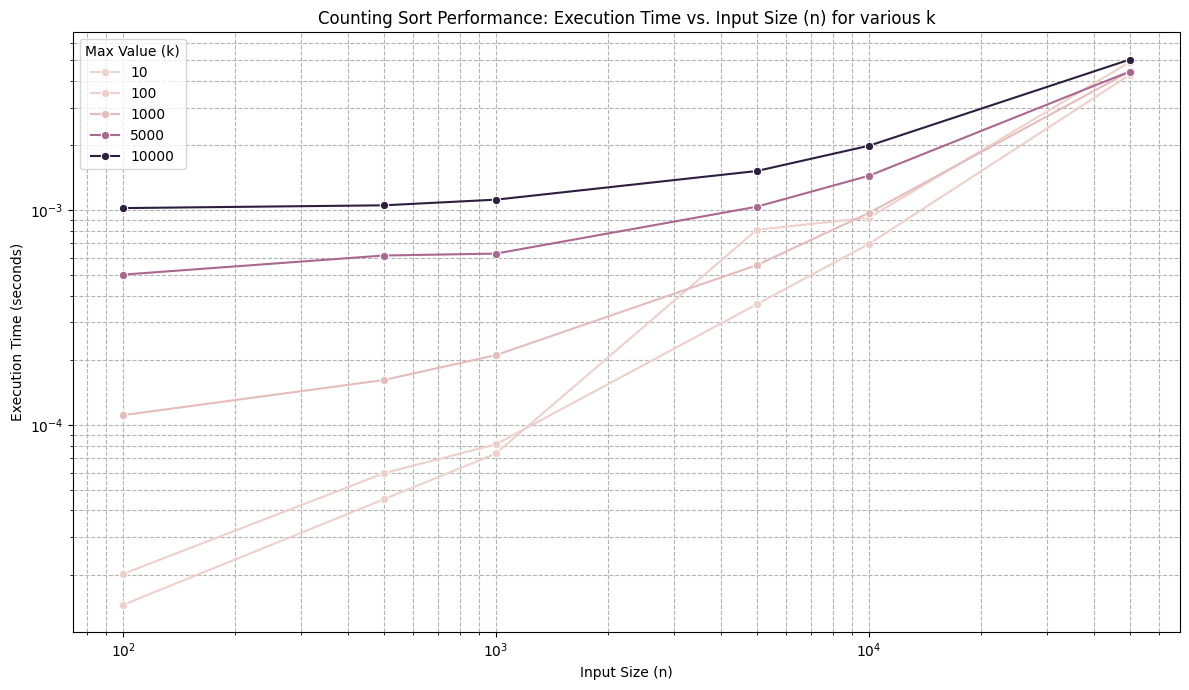

In [4]:
#write code for above cell and compute the running time and also plot graph.
def counting_sort(arr):

    if not arr:
        return []


    k = max(arr)


    counts = [0] * (k + 1)
    for num in arr:
        counts[num] += 1

    sorted_arr = []

    for i in range(k + 1):
        for _ in range(counts[i]):
            sorted_arr.append(i)

    return sorted_arr

sample_input = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
sample_output = counting_sort(sample_input)

print(f"Original Array: {sample_input}")
print(f"Sorted Array (Counting Sort): {sample_output}")
#for running time
import random
import time
performance_data = []

n_values = [100, 500, 1000, 5000, 10000, 50000]
k_values = [10, 100, 1000, 5000, 10000]

print("Collecting performance data...")
for n in n_values:
    for k in k_values:

        arr = [random.randint(0, k) for _ in range(n)]

        start_time = time.time()
        counting_sort(arr)
        end_time = time.time()

        elapsed_time = end_time - start_time
        performance_data.append((n, k, elapsed_time))
        print(f"  n={n}, k={k}: {elapsed_time:.6f} seconds")

print("\nPerformance Data:")
for data_point in performance_data:
    print(f"(n={data_point[0]}, k={data_point[1]}, time={data_point[2]:.6f})")
    # for graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_performance = pd.DataFrame(performance_data, columns=['n', 'k', 'time'])

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_performance, x='n', y='time', hue='k', marker='o')

plt.title('Counting Sort Performance: Execution Time vs. Input Size (n) for various k')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend(title='Max Value (k)')
plt.tight_layout()
plt.show()

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


  n=100, k=10, num_buckets=10: 0.000048 seconds
  n=100, k=100, num_buckets=10: 0.000049 seconds
  n=100, k=1000, num_buckets=10: 0.000046 seconds
  n=100, k=5000, num_buckets=10: 0.000052 seconds
  n=100, k=10000, num_buckets=10: 0.000048 seconds
  n=500, k=10, num_buckets=50: 0.000285 seconds
  n=500, k=100, num_buckets=50: 0.000165 seconds
  n=500, k=1000, num_buckets=50: 0.000189 seconds
  n=500, k=5000, num_buckets=50: 0.000194 seconds
  n=500, k=10000, num_buckets=50: 0.000191 seconds
  n=1000, k=10, num_buckets=100: 0.000290 seconds
  n=1000, k=100, num_buckets=100: 0.000295 seconds
  n=1000, k=1000, num_buckets=100: 0.000780 seconds
  n=1000, k=5000, num_buckets=100: 0.000373 seconds
  n=1000, k=10000, num_buckets=100: 0.000359 seconds
  n=5000, k=10, num_buckets=500: 0.001805 seconds
  n=5000, k=100, num_buckets=500: 0.001632 seconds
  n=5000, k=1000, num_buckets=500: 0.001986 seconds
  n=5000, k=5000, num_buckets=500: 0.002107 seconds
  n=5000, k=10000, num_buckets=500: 0.001

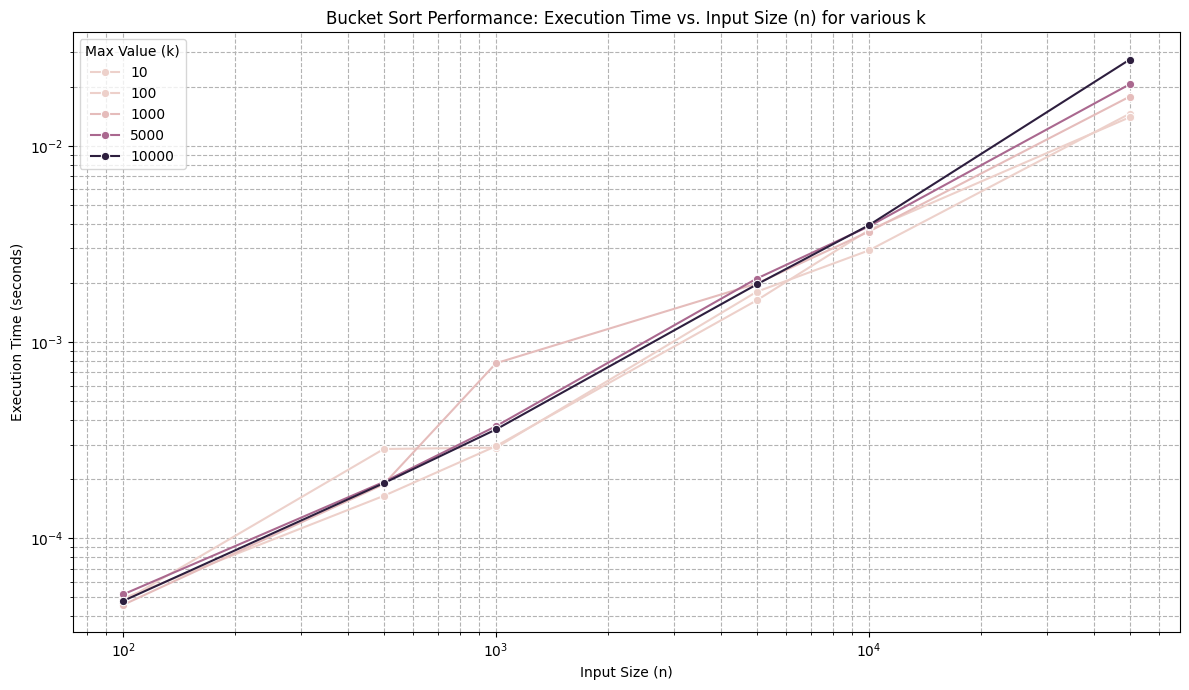

In [8]:
#write code for above cell and compute the running time and also plot graph.
#write code for above cell and compute the running time and also plot graph.
def bucket_sort(arr, num_buckets=10):
    if not arr or len(arr) <= 1:
        return arr

    min_val = min(arr)
    max_val = max(arr)

    if max_val == min_val:
        return arr

    buckets = [[] for _ in range(num_buckets)]


    for num in arr:
        bucket_index = int((num - min_val) * num_buckets / (max_val - min_val + 1e-9))
        if bucket_index >= num_buckets:
            bucket_index = num_buckets - 1
        buckets[bucket_index].append(num)
    sorted_arr = []
    for bucket in buckets:

        sorted_arr.extend(sorted(bucket))

    return sorted_arr
# FOR RUNNING TIME
import random
import time

performance_data = []

n_values = [100, 500, 1000, 5000, 10000, 50000]
k_values = [10, 100, 1000, 5000, 10000]

print("Collecting performance data for Bucket Sort...")
for n in n_values:
    for k in k_values:

        arr = [random.randint(0, k) for _ in range(n)]

        start_time = time.time()
        num_buckets_chosen = max(10, min(n // 10, 1000))
        bucket_sort(arr, num_buckets=num_buckets_chosen)
        end_time = time.time()

        elapsed_time = end_time - start_time
        performance_data.append((n, k, elapsed_time))
        print(f"  n={n}, k={k}, num_buckets={num_buckets_chosen}: {elapsed_time:.6f} seconds")

print("\nPerformance Data:")
for data_point in performance_data:
    print(f"(n={data_point[0]}, k={data_point[1]}, time={data_point[2]:.6f})")

#plot graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_performance = pd.DataFrame(performance_data, columns=['n', 'k', 'time'])

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_performance, x='n', y='time', hue='k', marker='o')

plt.title('Bucket Sort Performance: Execution Time vs. Input Size (n) for various k')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend(title='Max Value (k)')
plt.tight_layout()
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Original Array: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sorted Array (Radix Sort): [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]
  n=100, k=10: 0.000061 seconds
  n=100, k=100: 0.000089 seconds
  n=100, k=1000: 0.000096 seconds
  n=100, k=5000: 0.000168 seconds
  n=100, k=10000: 0.000120 seconds
  n=500, k=10: 0.000313 seconds
  n=500, k=100: 0.000451 seconds
  n=500, k=1000: 0.000564 seconds
  n=500, k=5000: 0.000864 seconds
  n=500, k=10000: 0.000717 seconds
  n=1000, k=10: 0.000662 seconds
  n=1000, k=100: 0.000982 seconds
  n=1000, k=1000: 0.001215 seconds
  n=1000, k=5000: 0.001415 seconds
  n=1000, k=10000: 0.002038 seconds
  n=5000, k=10: 0.003839 seconds
  n=5000, k=100: 0.005237 seconds
  n=5000, k=1000: 0.009335 seconds
  n=5000, k=5000: 0.007862 seconds
  n=5000, k=10000: 0.006987 seconds
  n=10000, k=10: 0.007436 seconds
  n=10000, k=100: 0.010830 seconds
  n=10000, k=1000: 0.015394 seconds
  n=10000, k=5000: 0.016473 seconds
  n=10000, k=10000: 0.017755 seconds
  n=50000, k=10: 0.06

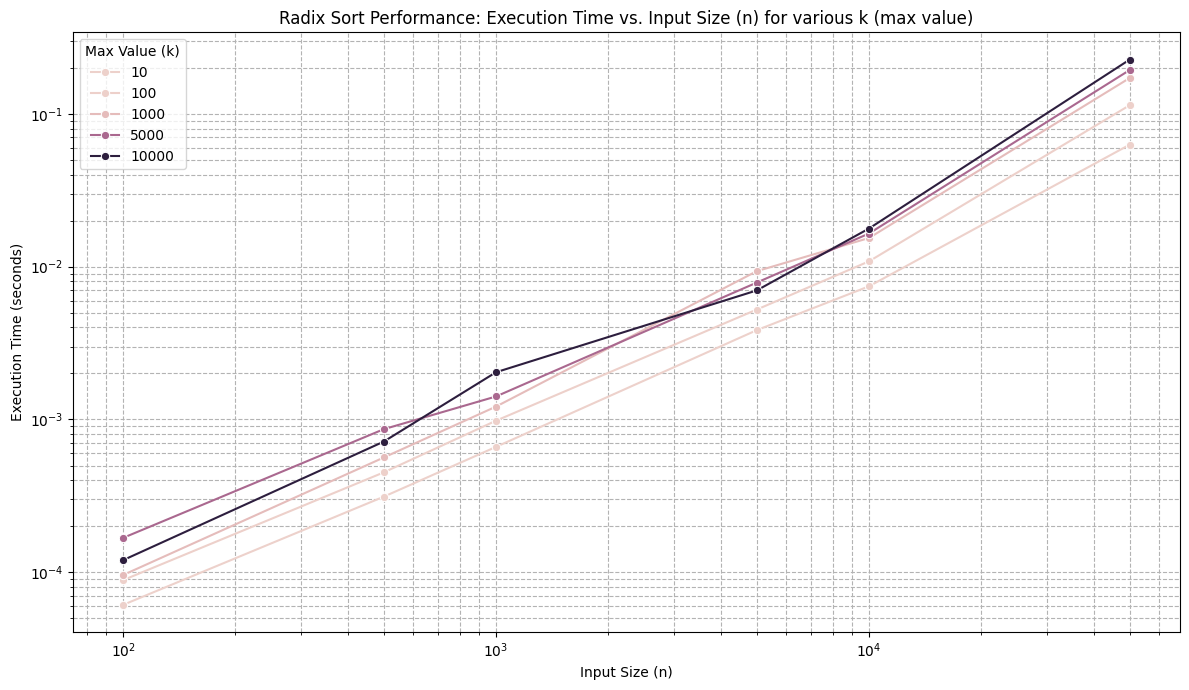

In [10]:
#write code for above cell and compute the running time and also plot graph.
#write code for above cell and compute the running time and also plot graph.
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def counting_sort_for_radix(arr, exponent):
    n = len(arr)
    output = [0] * n
    count = [0] * 10


    for i in range(n):
        index = arr[i] // exponent
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]


    i = n - 1
    while i >= 0:
        index = arr[i] // exponent
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    if not arr or len(arr) <= 1:
        return arr

    # Find the maximum number to know number of digits
    max_val = max(arr)

    exponent = 1
    while max_val // exponent >= 1:
        counting_sort_for_radix(arr, exponent)
        exponent *= 10
    return arr

sorted_sample_input = list(sample_input)
radix_sort(sorted_sample_input)
print(f"Original Array: {sample_input}")
print(f"Sorted Array (Radix Sort): {sorted_sample_input}")

performance_data = []

n_values = [100, 500, 1000, 5000, 10000, 50000]
k_values = [10, 100, 1000, 5000, 10000]

print("Collecting performance data for Radix Sort...")
for n in n_values:
    for k in k_values:
        arr = [random.randint(0, k) for _ in range(n)]
        arr_copy = list(arr)

        start_time = time.time()
        radix_sort(arr_copy)
        end_time = time.time()

        elapsed_time = end_time - start_time
        performance_data.append((n, k, elapsed_time))
        print(f"  n={n}, k={k}: {elapsed_time:.6f} seconds")

print("\nPerformance Data:")
for data_point in performance_data:
    print(f"(n={data_point[0]}, k={data_point[1]}, time={data_point[2]:.6f})")

# Plotting
df_performance_radix = pd.DataFrame(performance_data, columns=['n', 'k', 'time'])

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_performance_radix, x='n', y='time', hue='k', marker='o')

plt.title('Radix Sort Performance: Execution Time vs. Input Size (n) for various k (max value)')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend(title='Max Value (k)')
plt.tight_layout()
plt.show()